<a href="https://colab.research.google.com/github/gr39my/for_qiita/blob/main/colab%E3%81%A7%E3%82%B9%E3%83%97%E3%82%B7%E3%82%92%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%82%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. データ読み込み

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
sns.set()

!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
japanize_matplotlib.japanize()

In [ ]:
# 認証のためのコード
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
## スプレッドシートを開く（シートURLから）
url = "https://docs.google.com/spreadsheets/d/12GsIwLvAX8vGNA1m1XWM_YupRG2oGIJOhQ15KiDeocs/edit#gid=0"
ss = gc.open_by_url(url)

# シートを特定する（シート名で特定）
st = ss.worksheet("シート1")

# スプレッドシートのデータをPandasのDataframeに変換する。
rows = st.get_all_values()
df = pd.DataFrame.from_records(rows[1:], columns=rows[0])


In [ ]:
df.head()

,日付,体重,備考
0,2024/6/1,65.0,
1,2024/6/2,64.7,
2,2024/6/3,64.8,
3,2024/6/4,65.2,たくさん食べた
4,2024/6/5,63.9,


# 2. データ型の変更

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付      14 non-null     object
 1   体重      14 non-null     object
 2   備考      14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [ ]:
# floatに変更
num_cols = ['体重']
df[num_cols] = df[num_cols].astype(float)

# datetimeに変更
datetime_cols = ['日付']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format='%Y/%m/%d', errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      14 non-null     datetime64[ns]
 1   体重      14 non-null     float64       
 2   備考      14 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 464.0+ bytes


# 3. 可視化

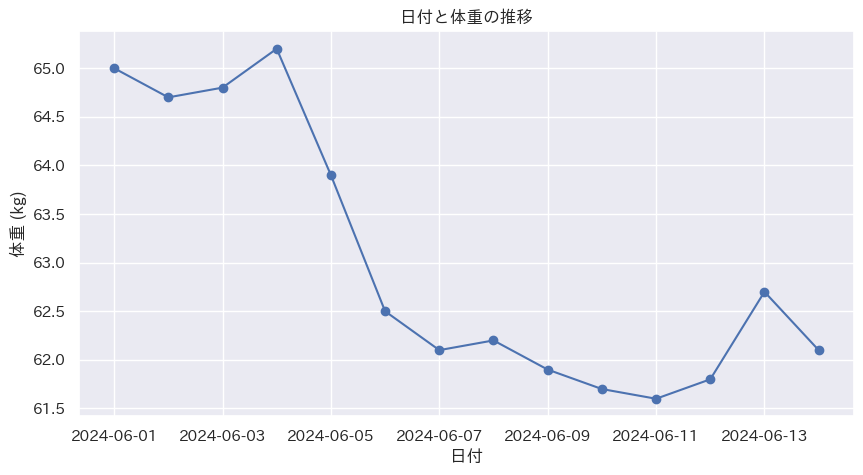

In [ ]:
# 折れ線グラフの作成
plt.figure(figsize=(10, 5))
plt.plot(df['日付'], df['体重'], marker='o', linestyle='-', color='b')

# グラフのタイトルとラベルを設定
plt.title('日付と体重の推移')
plt.xlabel('日付')
plt.ylabel('体重 (kg)')

# グラフを表示
plt.grid(True)
plt.show()